In [25]:
from keras.datasets import mnist
import os
from keras.utils import np_utils
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
import matplotlib.pyplot as plt
import pandas as pd

In [26]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

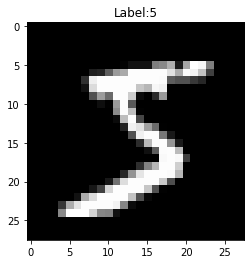

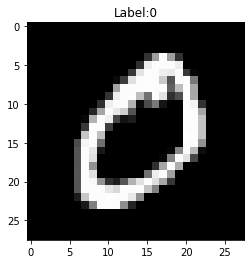

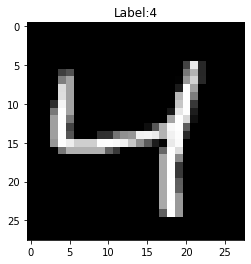

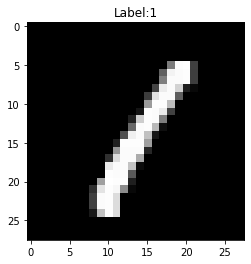

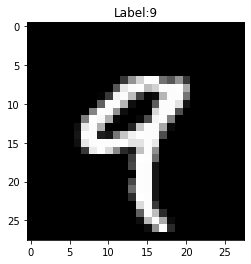

In [27]:
import matplotlib.pyplot as plt
for i in range(5):
  plt.imshow(X_train[i], cmap='gray')
  plt.title("Label:" + str(Y_train[i]))
  plt.show()

In [28]:
x_train = X_train.reshape(60000, 28, 28, 1)/255
x_test = X_test.reshape(10000, 28, 28, 1)/255
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

In [29]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), input_shape=(28, 28, 1), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(5, 5), input_shape=(28, 28, 1), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 16)        416       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 32)        12832     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 7, 7, 32)          0         
                                                                 
 flatten_4 (Flatten)         (None, 1568)             

In [30]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
history = model.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=128, verbose=2)

Epoch 1/10
375/375 - 5s - loss: 0.4053 - accuracy: 0.8712 - val_loss: 0.0769 - val_accuracy: 0.9768 - 5s/epoch - 12ms/step
Epoch 2/10
375/375 - 4s - loss: 0.1384 - accuracy: 0.9582 - val_loss: 0.0568 - val_accuracy: 0.9837 - 4s/epoch - 10ms/step
Epoch 3/10
375/375 - 4s - loss: 0.1013 - accuracy: 0.9700 - val_loss: 0.0531 - val_accuracy: 0.9841 - 4s/epoch - 10ms/step
Epoch 4/10
375/375 - 4s - loss: 0.0879 - accuracy: 0.9743 - val_loss: 0.0402 - val_accuracy: 0.9882 - 4s/epoch - 10ms/step
Epoch 5/10
375/375 - 3s - loss: 0.0738 - accuracy: 0.9779 - val_loss: 0.0364 - val_accuracy: 0.9899 - 3s/epoch - 9ms/step
Epoch 6/10
375/375 - 3s - loss: 0.0671 - accuracy: 0.9802 - val_loss: 0.0378 - val_accuracy: 0.9882 - 3s/epoch - 8ms/step
Epoch 7/10
375/375 - 3s - loss: 0.0590 - accuracy: 0.9820 - val_loss: 0.0302 - val_accuracy: 0.9910 - 3s/epoch - 8ms/step
Epoch 8/10
375/375 - 3s - loss: 0.0568 - accuracy: 0.9826 - val_loss: 0.0308 - val_accuracy: 0.9911 - 3s/epoch - 9ms/step
Epoch 9/10
375/375 -

In [32]:
loss, accuracy = model.evaluate(x_train, y_train)
print('Train:')
print('Loss: %s\nAccuracy: %s' % (loss, accuracy))
loss, accuracy = model.evaluate(x_test, y_test)
print('Test:')
print('Loss: %s\nAccuracy: %s' % (loss, accuracy))

1875/1875 [==============================] - 7s 4ms/step - loss: 0.0177 - accuracy: 0.9945
Train:
Loss: 0.01772906444966793
Accuracy: 0.9945166707038879
313/313 [==============================] - 1s 4ms/step - loss: 0.0229 - accuracy: 0.9930
Test:
Loss: 0.02289457805454731
Accuracy: 0.9929999709129333
